## NLP 감성분석

komis 한국자원정보서비스 일일자원뉴스 기사 분석

In [1]:
import pandas as pd
import re

In [2]:
# 데이터 불러오기
news_17 = pd.read_excel('2017_news.xlsx')
news_1819 = pd.read_excel('2018-2019_news.xlsx')
news_2023 = pd.read_excel('2020-2023_news.xlsx')
news_24 = pd.read_excel('2024_news.xlsx')

In [4]:
combined_df = pd.concat([news_17, news_1819, news_2023, news_24], ignore_index=True)

In [6]:
# 텍스트 전처리 함수
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # 공백 제거
    text = re.sub(r'[^\w\s]', '', text)  # 특수문자 제거
    text = text.strip()  # 앞뒤 공백 제거
    return text

# 기사 내용 전처리
combined_df['cleaned_body'] = combined_df['body'].apply(clean_text)

In [7]:
combined_df

date                                         title  \
0    2017-12-26                        LME 니켈 가격, 톤당 1만2천불 회복   
1    2017-12-22                         필리핀, 캐나다 지속가능 개발 벤치마킹   
2    2017-12-18                   Sherritt, Ambatovy 지분 축소 완료   
3    2017-12-08                    LME 니켈 가격, 톤당 1만1천불 아래로 하락   
4    2017-12-07                    SHFE 니켈 가격, 톤당 11,000불로 하락   
..          ...                                           ...   
338  2024-02-07                       니켈, 인도네시아 증산 지속으로 가격 급락   
339  2024-02-01                IGO사, 서호주 Cosmos 니켈 프로젝트 조업중단    
340  2024-01-24                     니켈, 연이은 조업중단 불구 가격 하락세 지속   
341  2024-01-17  First Quantum사, 서호주 Ravensthorpe 니켈 광산 조업 중단   
342  2024-01-15                      BMI : ’24년 니켈 가격 전망 하향조정   

                                                  body  \
0    12월 21일 LME 니켈 가격이 톤당 1만2천불을 회복하였음. 현물 가격이 11월...   
1    필리핀 광업협회 (The Chamber of Mines of the Philippi...   
2    캐나다 Sherritt International사는 마다가스카르 Ambatovy 니...   
3    LME 니켈 가격이 계속 하락하여 톤당 1만1천불 아래로 미끄러짐. 12월 5일 L...   
4    상하이 선물 거래소 (Shanghai Futures Exchange, SHFE)에서...   
..                                                 ...   
338  니켈은 인도네시아의 증산에 따른 공급과잉으로 런던금속거래소(LME)의 니켈 가격이 ...   
339  호주 광산업체 IGO Ltd사는 서호주 Cosmos 니켈 프로젝트를 유지보수 상태로...   
340  1월 22일 런던금속거래소(LME)의 니켈 가격은 니켈 광산들의 연이은 조업중단에도...   
341  캐나다 광산업체 First Quantum Minerals사는 니켈 가격 약세 속 서...   
342  금속시장 조사기관 BMI는 니켈 공급과잉 속 중국의 수요 부진으로 ’24년 니켈 가...   

                                          cleaned_body  
0    12월 21일 LME 니켈 가격이 톤당 1만2천불을 회복하였음 현물 가격이 11월 ...  
1    필리핀 광업협회 The Chamber of Mines of the Philippin...  
2    캐나다 Sherritt International사는 마다가스카르 Ambatovy 니...  
3    LME 니켈 가격이 계속 하락하여 톤당 1만1천불 아래로 미끄러짐 12월 5일 LM...  
4    상하이 선물 거래소 Shanghai Futures Exchange SHFE에서 니켈...  
..                                                 ...  
338  니켈은 인도네시아의 증산에 따른 공급과잉으로 런던금속거래소LME의 니켈 가격이 23...  
339  호주 광산업체 IGO Ltd사는 서호주 Cosmos 니켈 프로젝트를 유지보수 상태로...  
340  1월 22일 런던금속거래소LME의 니켈 가격은 니켈 광산들의 연이은 조업중단에도 불...  
341  캐나다 광산업체 First Quantum Minerals사는 니켈 가격 약세 속 서...  
342  금속시장 조사기관 BMI는 니켈 공급과잉 속 중국의 수요 부진으로 24년 니켈 가격...  

[343 rows x 4 columns]

In [8]:
combined_df_3 = combined_df.copy()

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
from googletrans import Translator

# Google 번역기 초기화
translator = Translator()

# ProsusAI의 FinBERT 모델 로드
model_name = "ProsusAI/finbert"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# 감정 분석 파이프라인 로드
finbert_pipeline = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

# 텍스트를 번역하고 감정 분석 수행 함수
def translate_and_get_sentiment(text):
    # 한국어 텍스트를 영어로 번역
    translated_text = translator.translate(text, src='ko', dest='en').text
    # 번역된 텍스트에 대해 감정 분석 수행
    result = finbert_pipeline(translated_text)[0]
    if result['label'] == 'positive':
        return 1
    elif result['label'] == 'neutral':
        return 0
    else:
        return -1


# 감정 점수 계산
combined_df_3['sentiment_score'] = combined_df_3['cleaned_body'].apply(translate_and_get_sentiment)




In [13]:
combined_df_3['date'] = pd.to_datetime(combined_df_3['date'])

In [14]:
combined_df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             343 non-null    datetime64[ns]
 1   title            343 non-null    object        
 2   body             343 non-null    object        
 3   cleaned_body     343 non-null    object        
 4   sentiment_score  343 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 13.5+ KB


In [26]:
# 감정 라벨을 의미 있는 이름으로 변환하는 함수
def label_sentiment(sentiment):
    if sentiment == -1:
        return 'Negative'
    elif sentiment == 0:
        return 'Neutral'
    elif sentiment == 1:
        return 'Positive'



# 감정 라벨 변환 적용
combined_df_3['sentiment_label'] = combined_df_3['sentiment_score'].apply(label_sentiment)

In [27]:
combined_df_3.sort_values(by='date', inplace=True)

In [28]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.dates as mdates

plt.rc('font', family='Malgun Gothic')
%matplotlib inline

matplotlib.rcParams['axes.unicode_minus']=False

In [29]:
df_2020 = combined_df_3[(combined_df_3['date']>='2020-01-01')&(combined_df_3['date']<='2020-06-30')]

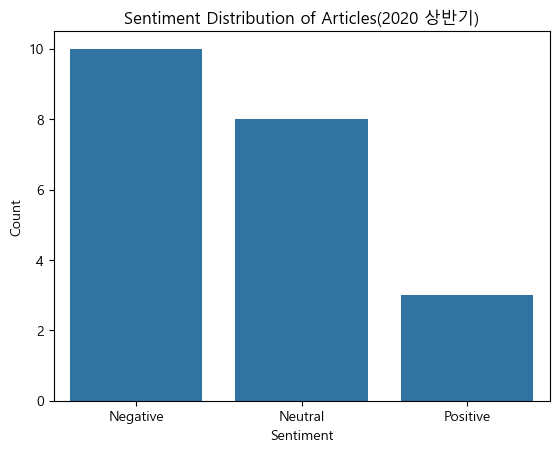

In [31]:
import seaborn as sns
# 감정 분포 시각화
sns.countplot(data=df_2020, x='sentiment_label')
plt.title('Sentiment Distribution of Articles(2020 상반기)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [32]:
df_2022 = combined_df_3[(combined_df_3['date']>='2022-01-01')&(combined_df_3['date']<='2022-06-30')]

In [36]:
df_2022.sort_values(by='sentiment_label',inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_38436\1490549158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022.sort_values(by='sentiment_label',inplace=True)


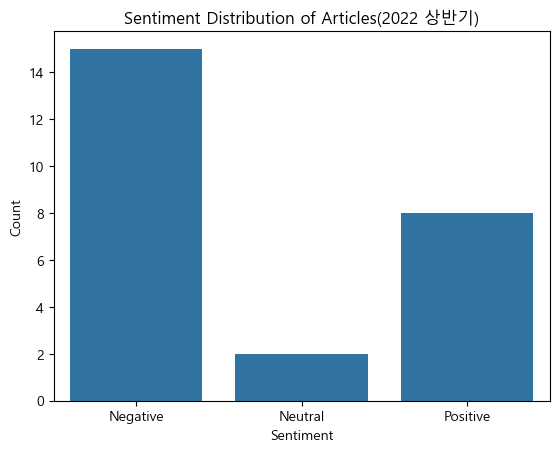

In [37]:
import seaborn as sns
# 감정 분포 시각화
sns.countplot(data=df_2022, x='sentiment_label')
plt.title('Sentiment Distribution of Articles(2022 상반기)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

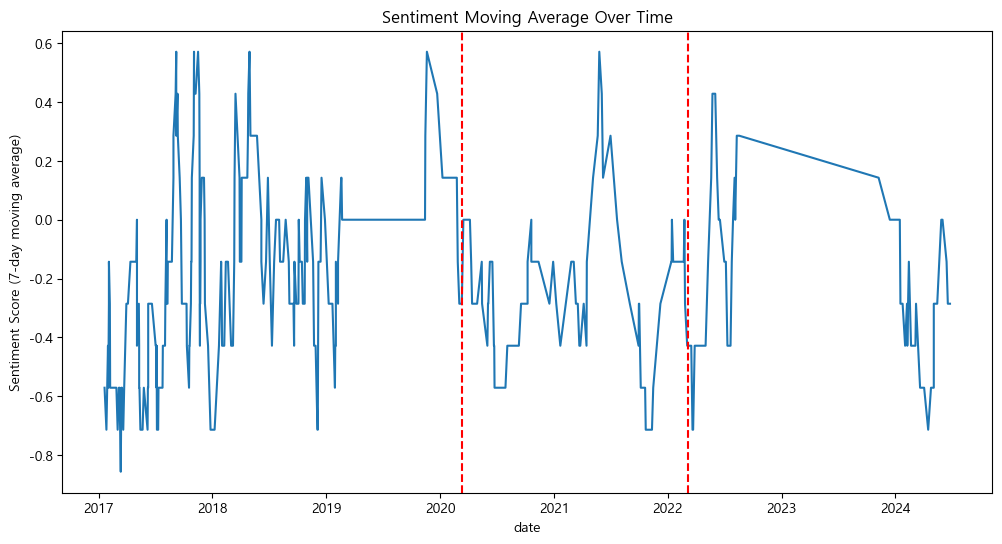

In [38]:
# 7일 이동 평균 계산
combined_df_3['sentiment_moving_avg'] = combined_df_3['sentiment_score'].rolling(window=7).mean()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(combined_df_3['date'], combined_df_3['sentiment_moving_avg'])
plt.title('Sentiment Moving Average Over Time')
plt.xlabel('date')
plt.ylabel('Sentiment Score (7-day moving average)')

# 주요 사건 표시
important_dates = ['2020-03-11','2022-03-07']
for date in important_dates:
    plt.axvline(pd.to_datetime(date), color='r', linestyle='--')

plt.show()


2020년 상반기(코로나 팬데믹 선언)와 2022년 상반기(러시아의 우크라이나 침공)에 부정적인 기사가 많았음을 알 수 있음 => 해당기간에 니켈 가격 상승